In [535]:
import lxml.html
import lxml.etree
import requests
import re
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from collections import defaultdict, Counter 
nltk.download('stopwords')
nltk.download('punkt')
import pandas as pd
from nltk.stem.snowball import RussianStemmer 
rs = RussianStemmer()
import numpy as np
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Пользователь\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Пользователь\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [499]:
state=requests.get('https://ru.wikipedia.org/wiki/Фильм')
data=lxml.html.fromstring(state.text)
headers=data.xpath('//h2/span/@id')[:-5]
texts=data.xpath('//h2/span[contains(@class,mw-headline)]/@id|//h2/following::p/text()|//h2/following::p/a/text()')


In [500]:
stopWords = set(stopwords.words('russian'))
def calc_tf_dict(doc):
    c = Counter()
    for word in doc:
        c[word] += 1
    return c 

In [514]:
temp=[]
docs=[]
temp3=[]
dicts=[]
i=0
j=2
reg=re.compile('[^а-яА-Яё]')
for text in texts:
    if j>=len(headers):
        break
    if text==headers[j]:
        docs.append(' '.join(temp))
        temp0=str.lower(reg.sub(' ',docs[i]))
        temp2=word_tokenize(temp0)
        for word in temp2:
            if word not in stopWords:
                temp3.append(rs.stem(word))
        dts=dict(calc_tf_dict(temp3))
        dicts.append(dts)
        temp=[]
        temp3=[]
        i+=1
        j+=2
        continue
    else:
        temp.append(text)

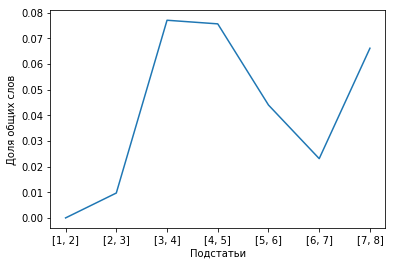

In [574]:
n=len(dicts)-1
xlabels = []
y=np.ones(n)
x=np.arange(n)
for i in range(n):
    shared_keys = set(dicts[i].keys()) & set(dicts[i+1].keys())
    lenght1=len(dicts[i])+len(dicts[i+1])
    lenght2=len(shared_keys) 
    y[i]=lenght2/lenght1
    xlabels.append(str([i+1,i+2]))
plt.xticks(x,xlabels)
plt.xlabel('Подстатьи')
plt.ylabel('Доля общих слов')
plt.plot(x,y) 